In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use("typewriter")

from scripts.plotting import plot_confusion_matrix
import sklearn.metrics
import pandas as pd

In [2]:
WRITE=True
MODEL="roof"

In [3]:
label_keys = ["gabled", "hipped", "flat"]
label_file = "labels/roofType-cmp.tsv"
pred_file = "models/rooftype_ResNet50_V0.2.csv"

In [4]:
preds = pd.read_csv(pred_file)
preds["image"] = preds["image"].apply(lambda x: str(Path(x).name))
preds = preds.set_index("image")

In [5]:
labels = pd.read_csv(
    label_file,
    sep="\t",
    names=["image","label"],
    header=None
).set_index("image")
labels = labels[labels["label"].isin(label_keys)].join(preds)

labels

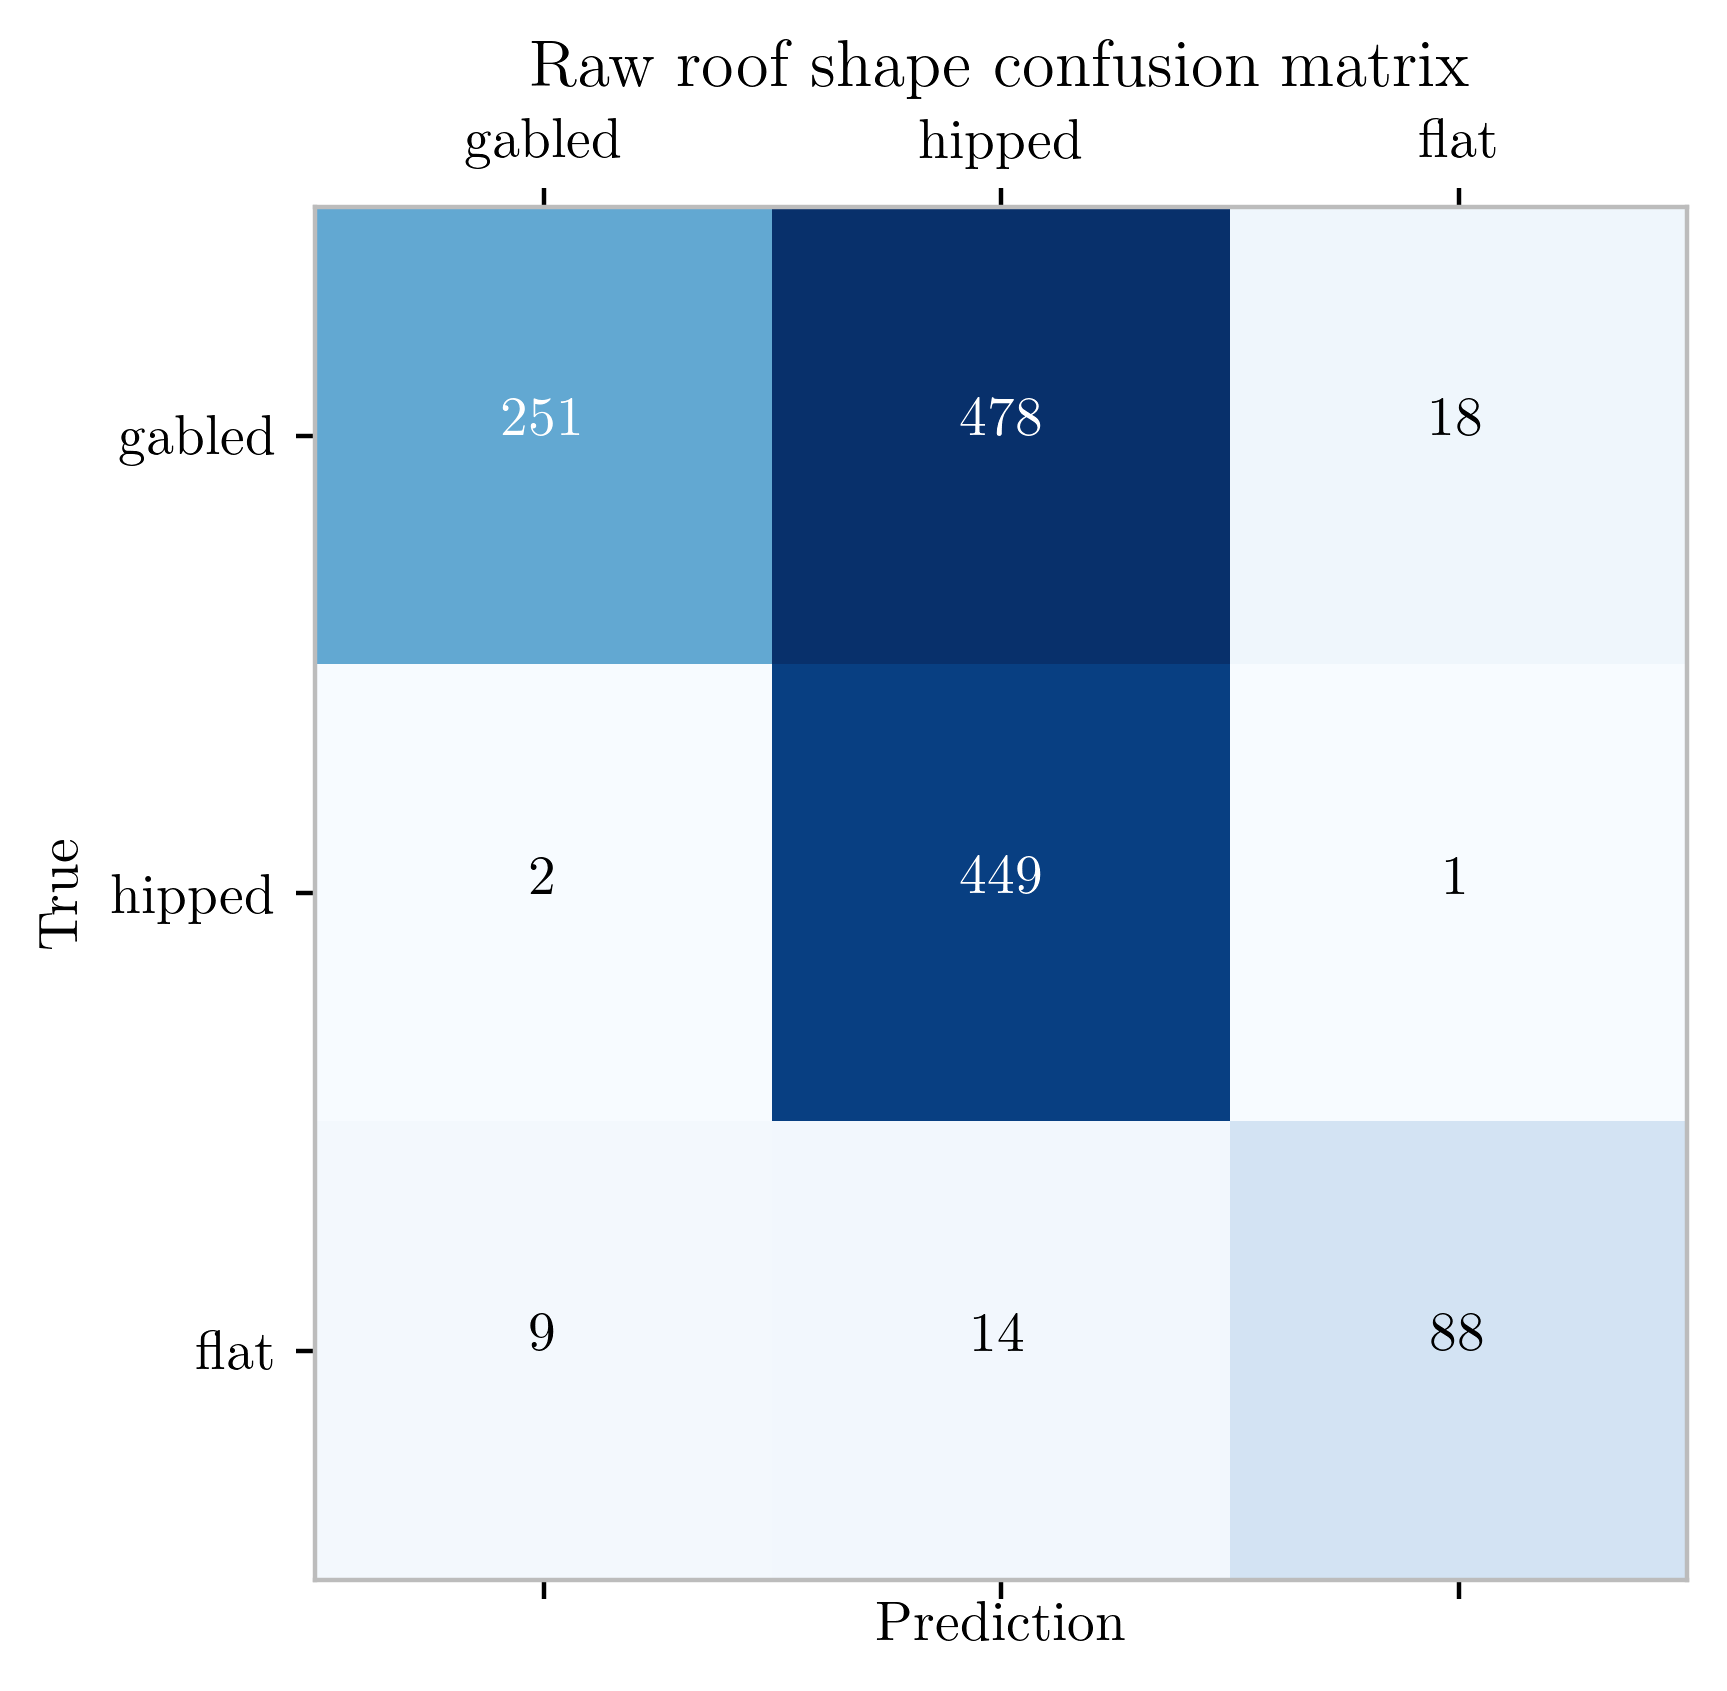

In [6]:
norms = ["true", "pred", "all"]
names = ["M[i,j] / sum(M[i,:])", "M[i,j] / sum(M[:,j])", "M[i,j] / sum(M)"]

cmatrix = sklearn.metrics.confusion_matrix(labels["label"], labels["prediction"], labels=label_keys)
ax_raw = plot_confusion_matrix(cmatrix,label_keys)
ax_raw.set_xticks(range(len(label_keys)))
ax_raw.set_xticklabels(label_keys)
ax_raw.set_yticks(range(len(label_keys)))
ax_raw.set_yticklabels(label_keys);
ax_raw.set_ylabel("True")
ax_raw.set_ylabel("True")
ax_raw.set_title(f"Raw {MODEL} shape confusion matrix")
if WRITE:
    ax_raw.figure.savefig("docs/roof-conf-raw.png")

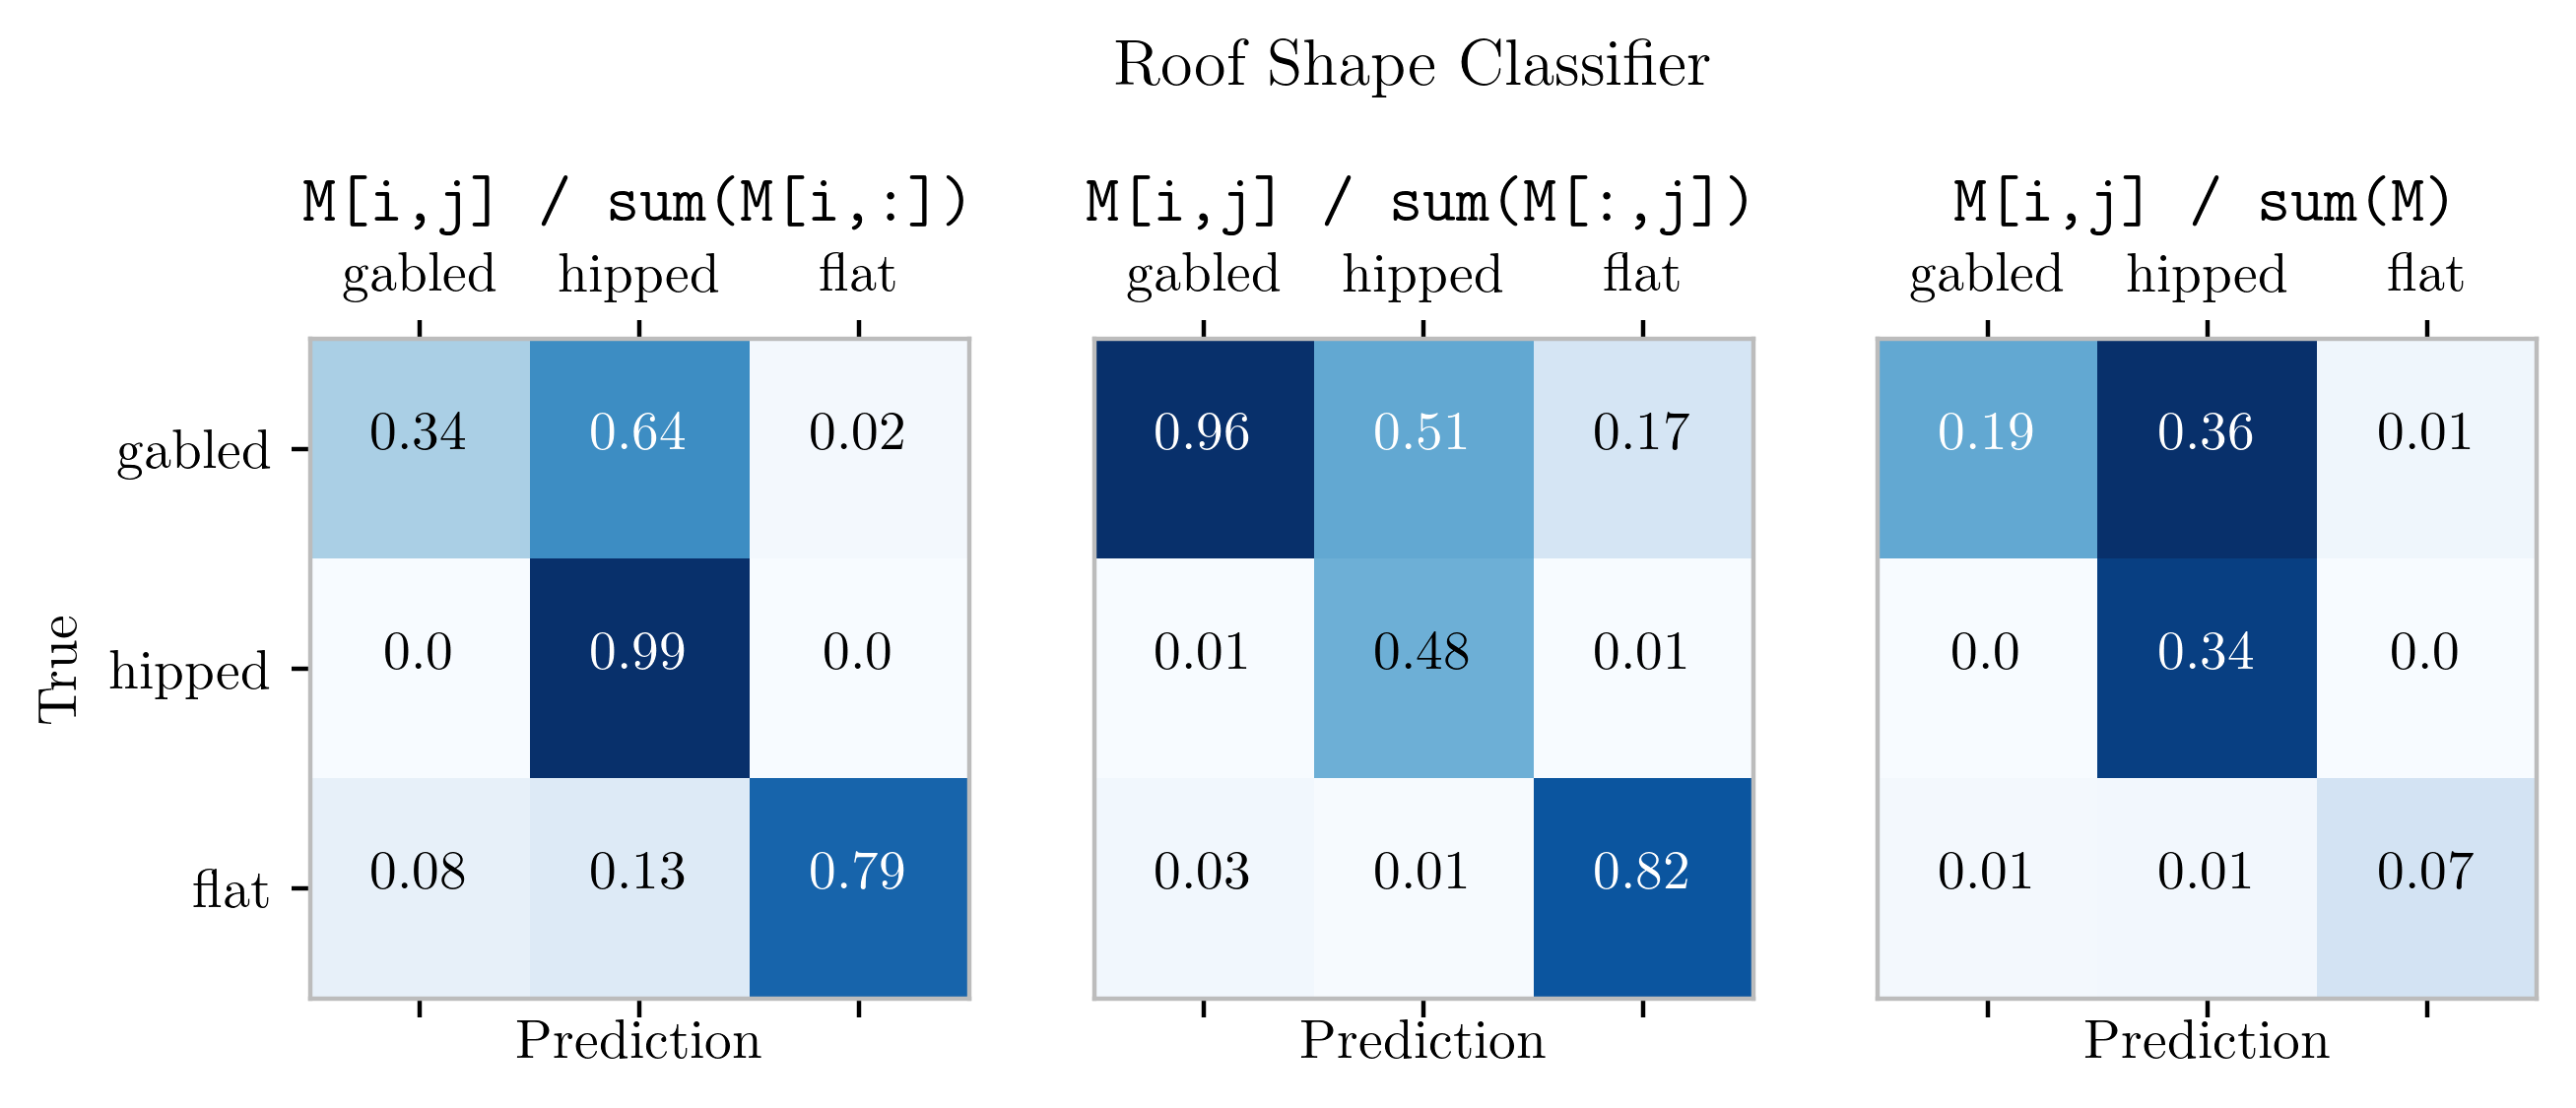

In [7]:
fig, ax = plt.subplots(1,len(norms))
for i,norm in enumerate(norms):
    cmatrix = sklearn.metrics.confusion_matrix(labels["label"], labels["prediction"], labels=label_keys, normalize=norm)
    plot_confusion_matrix(cmatrix,label_keys, ax=ax[i],
                          title=f"\\texttt{{{names[i]}}}")
    ax[i].set_xticks(range(len(label_keys)))
    ax[i].set_xticklabels(label_keys)
    ax[i].get_yaxis().set_visible(False)

ax[0].get_yaxis().set_visible(True)
ax[0].set_yticks(range(len(label_keys)))
ax[0].set_yticklabels(label_keys);
ax[0].set_ylabel("True")

fig.suptitle(f"Roof Shape Classifier", y=0.9)
if WRITE:
    fig.savefig("docs/roof-conf.png")